In [60]:
pip install pandas numpy seaborn matplotlib plotly scikit-learn xgboost lightgbm joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [62]:
df = pd.read_csv('usedCars.csv')

In [63]:
df.shape

(1064, 19)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City              1064 non-null   object 


In [65]:
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [66]:
(df.isnull().sum())/len(df) * 100

Id                   0.000000
Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

In [67]:
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [68]:
df.drop('Id',axis=1,inplace=True)

In [69]:
df.drop('TransmissionType',axis=1,inplace=True)

In [70]:
df.drop('CngKit', axis=1, inplace=True)

In [71]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [72]:
df.dropna(subset=['FuelType'], inplace=True)

In [73]:
df.drop('ManufactureDate', axis = 1, inplace=True)

In [74]:
df.drop('Variant', axis = 1, inplace=True)

In [75]:
df['ModelYear'] = 2024 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [76]:
for i in df.columns:
    print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1005
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [77]:
df.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000
mean,52835.253057,7.138288,8.348542e+05,0.738476,7.770085
std,33843.834922,2.996651,5.728864e+05,0.439672,0.720044
min,101.000000,1.000000,9.500000e+04,0.000000,0.000000
25%,32171.000000,5.000000,4.850000e+05,0.000000,7.500000
50%,49451.000000,7.000000,6.750000e+05,1.000000,7.800000
75%,68879.000000,9.000000,9.825000e+05,1.000000,8.100000
max,640000.000000,21.000000,8.500000e+06,1.000000,9.400000


In [78]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,6,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,3,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,9,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,4,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,14,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\2062559126.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')


Text(0.5, 1.0, 'Number of cars by company')

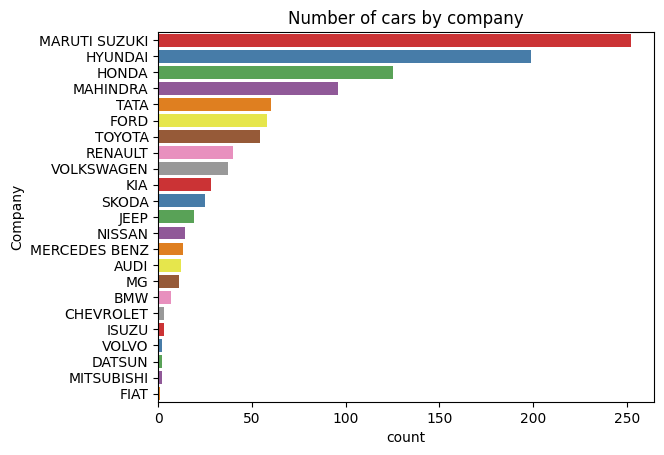

In [79]:
sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')

C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\972168075.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')


Text(0.5, 1.0, 'Top 10 Car Models')

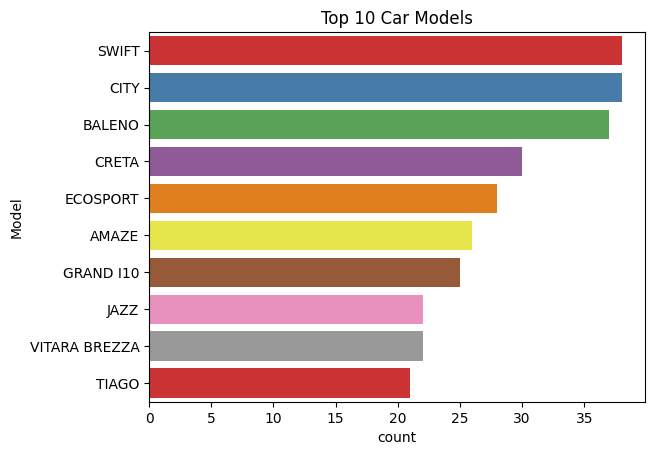

In [80]:
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')

C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\2829116679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

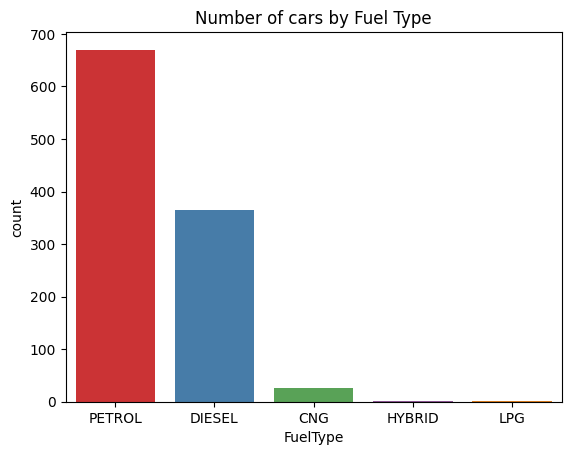

In [81]:
sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

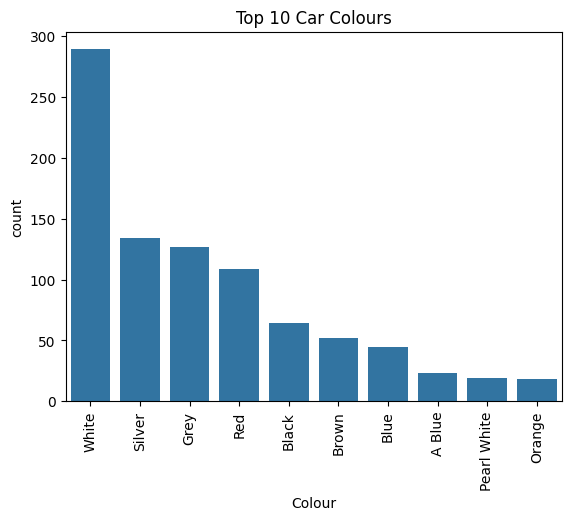

In [82]:
sns.countplot(x = 'Colour', data = df, order = df['Colour'].value_counts().iloc[:10].index).set_title('Top 10 Car Colours')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Odometer Reading')

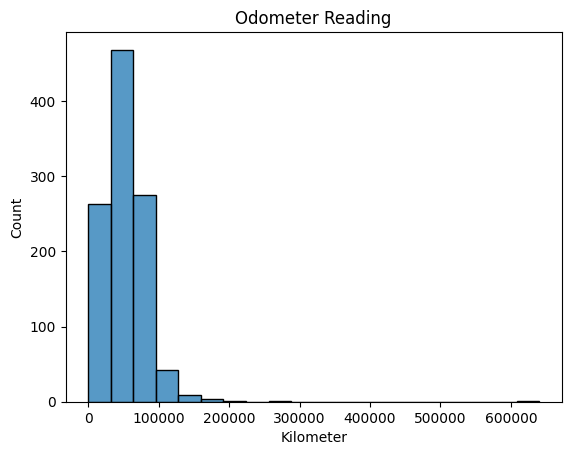

In [83]:
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

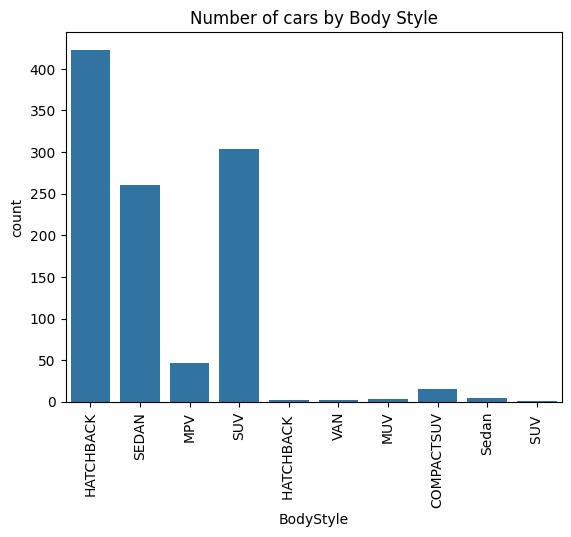

In [84]:
sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Car age distribution')

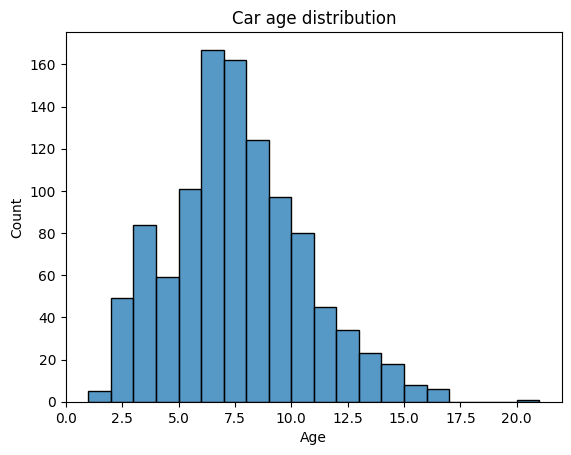

In [85]:
sns.histplot(x = 'Age', data = df, bins = 20).set_title('Car age distribution')

Text(0.5, 1.0, 'Car price distribution')

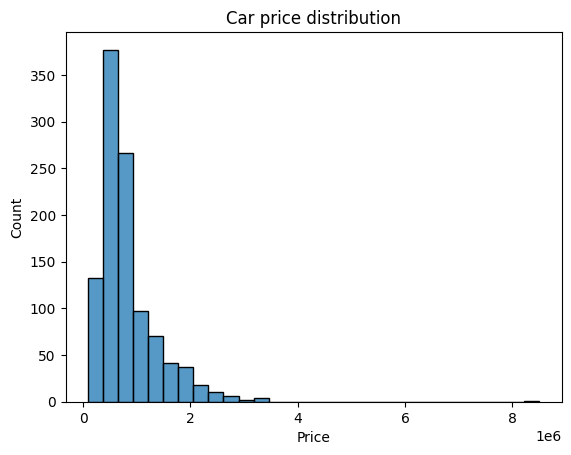

In [86]:
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\196354263.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\196354263.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\196354263.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

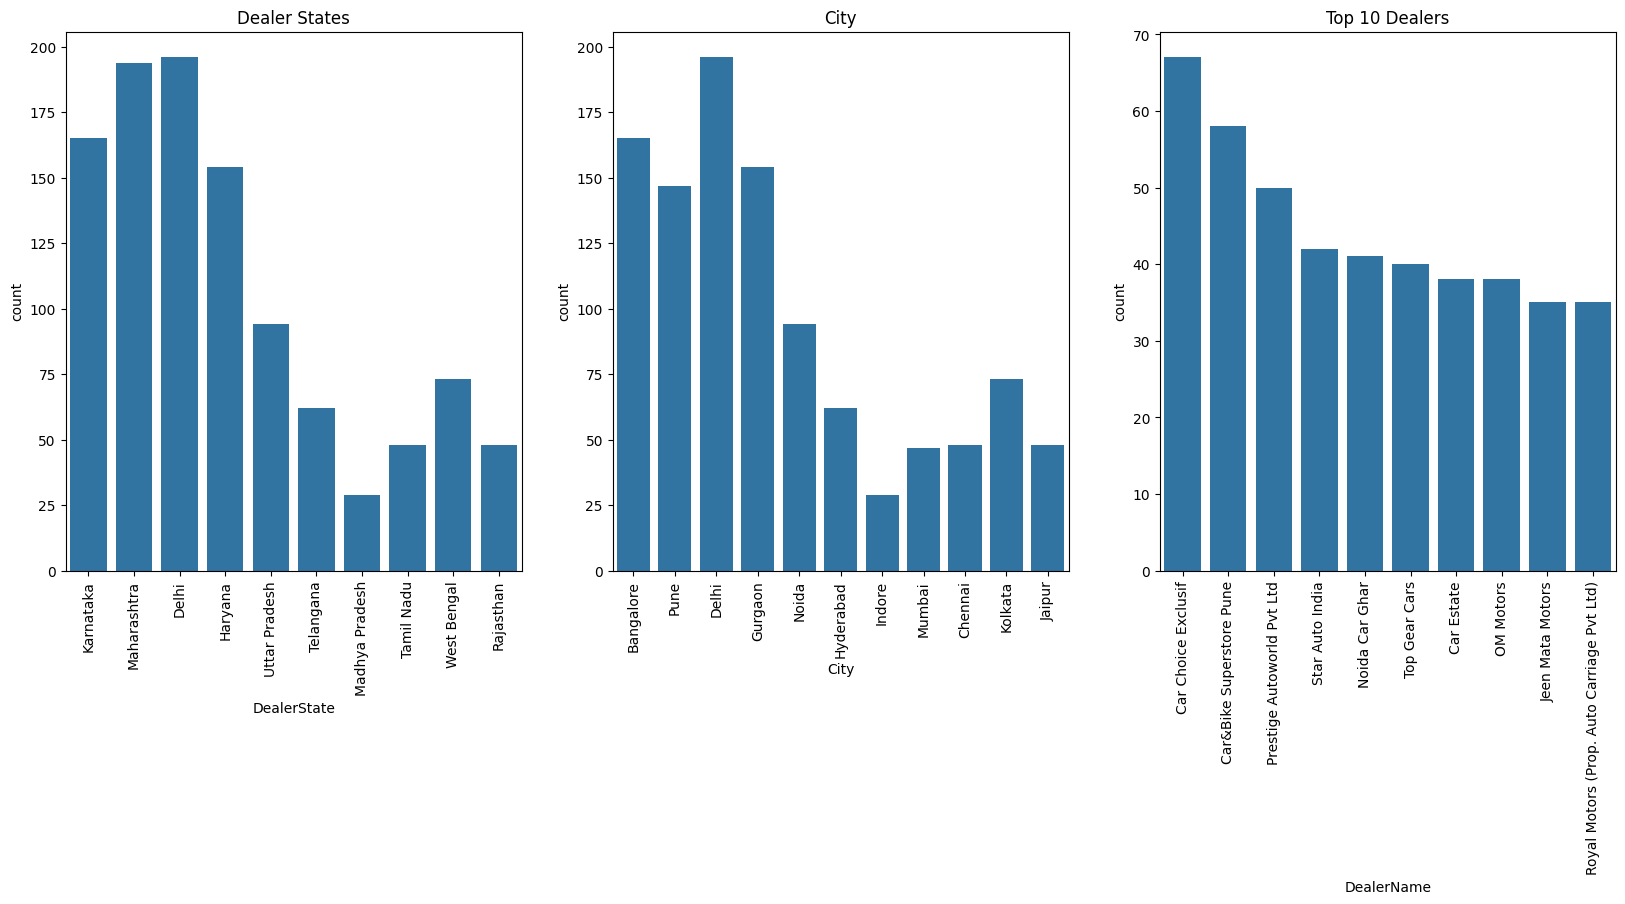

In [87]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

Text(0.5, 1.0, 'Number of cars by Owner Type')

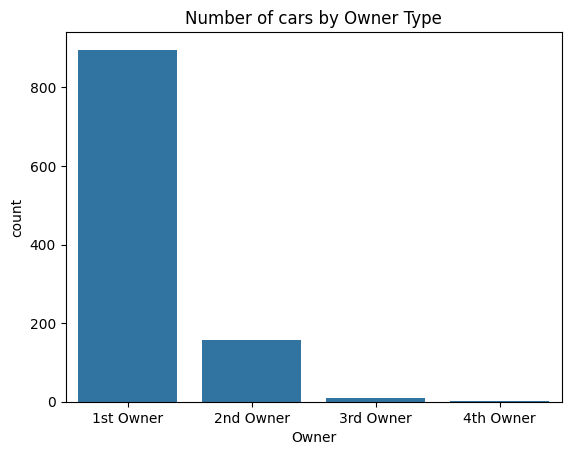

In [88]:
sns.countplot(x = 'Owner', data = df).set_title('Number of cars by Owner Type')

Text(0.5, 1.0, 'Number of cars by Warranty')

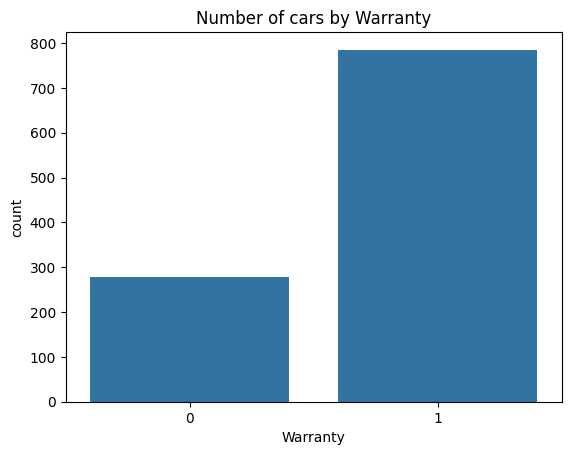

In [89]:
sns.countplot(x = 'Warranty', data = df).set_title('Number of cars by Warranty')

Text(0.5, 1.0, 'Quality Score Distribution')

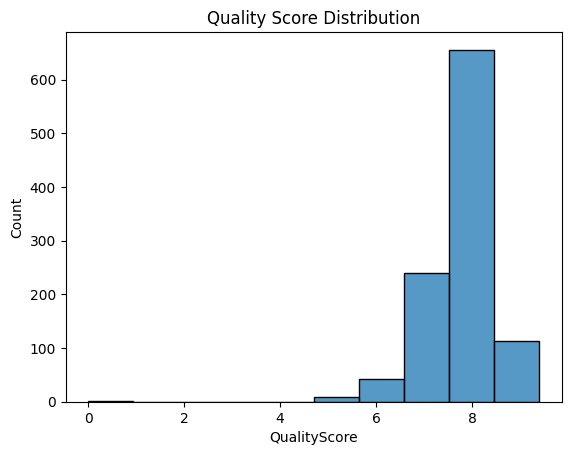

In [90]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('Quality Score Distribution')

Text(0.5, 1.0, 'Top 10 car Companies by price')

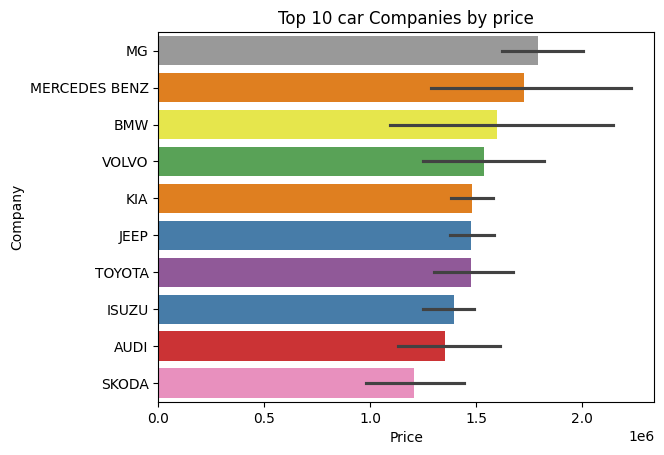

In [91]:
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Company', palette= 'Set1').set_title('Top 10 car Companies by price')

Text(0.5, 1.0, 'Top 10 car Models by price')

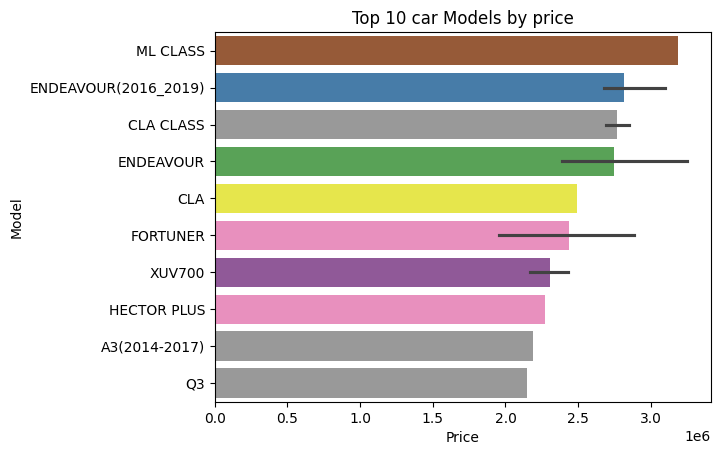

In [92]:
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')

Text(0.5, 1.0, 'Price by Fuel Type')

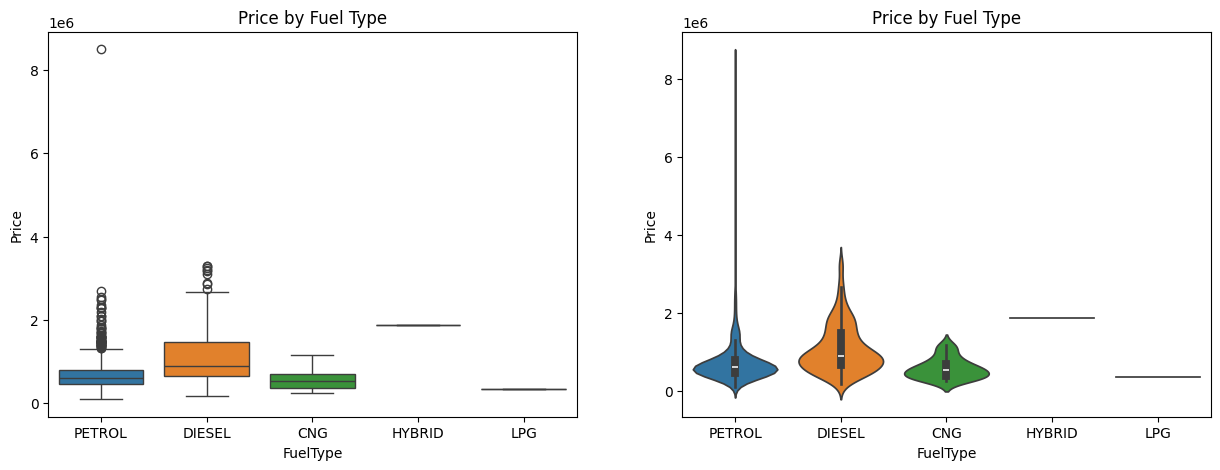

In [93]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')

Text(0.5, 1.0, 'Top 10 car Colors by price')

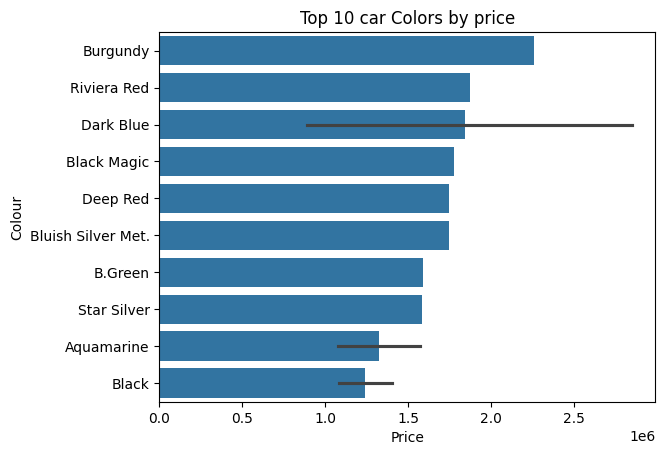

In [94]:
sns.barplot(y = 'Colour', x = 'Price', data = df, order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index).set_title('Top 10 car Colors by price')

Text(0.5, 1.0, 'Odometer Reading and Price')

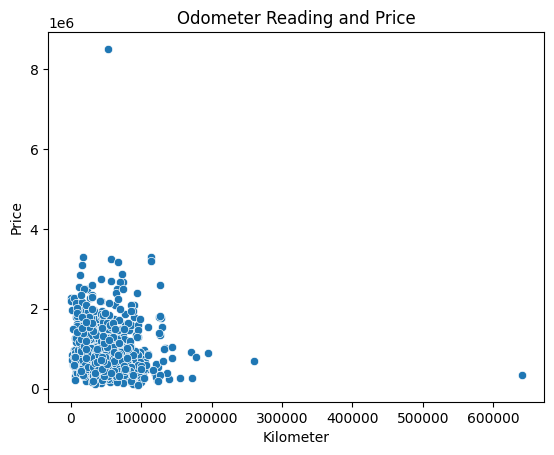

In [95]:
sns.scatterplot(x = 'Kilometer', y = 'Price', data = df).set_title('Odometer Reading and Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

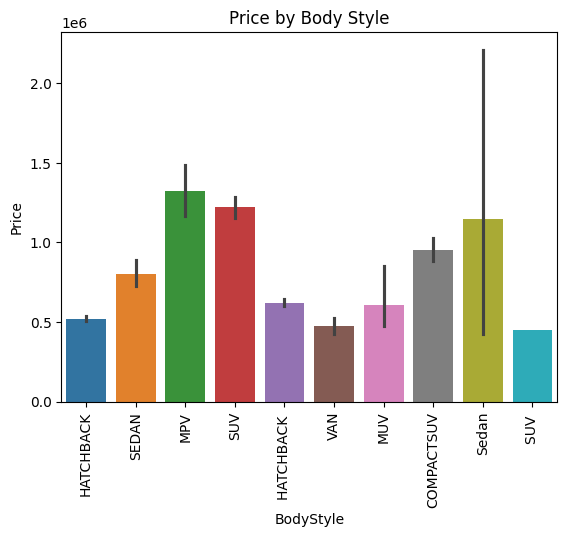

In [96]:
sns.barplot(x = 'BodyStyle', y = 'Price', data = df, hue = 'BodyStyle').set_title('Price by Body Style')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Car age and Price')

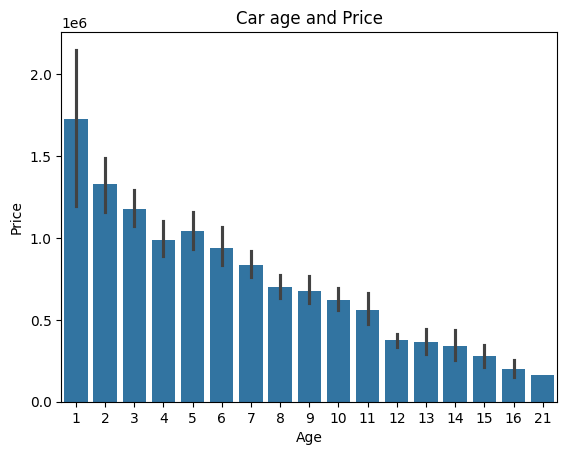

In [97]:
sns.barplot(x = 'Age', y = 'Price', data = df).set_title('Car age and Price')

C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\7821321.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\7821321.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\aryaman.kanwar\AppData\Local\Temp\ipykernel_18644\7821321.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

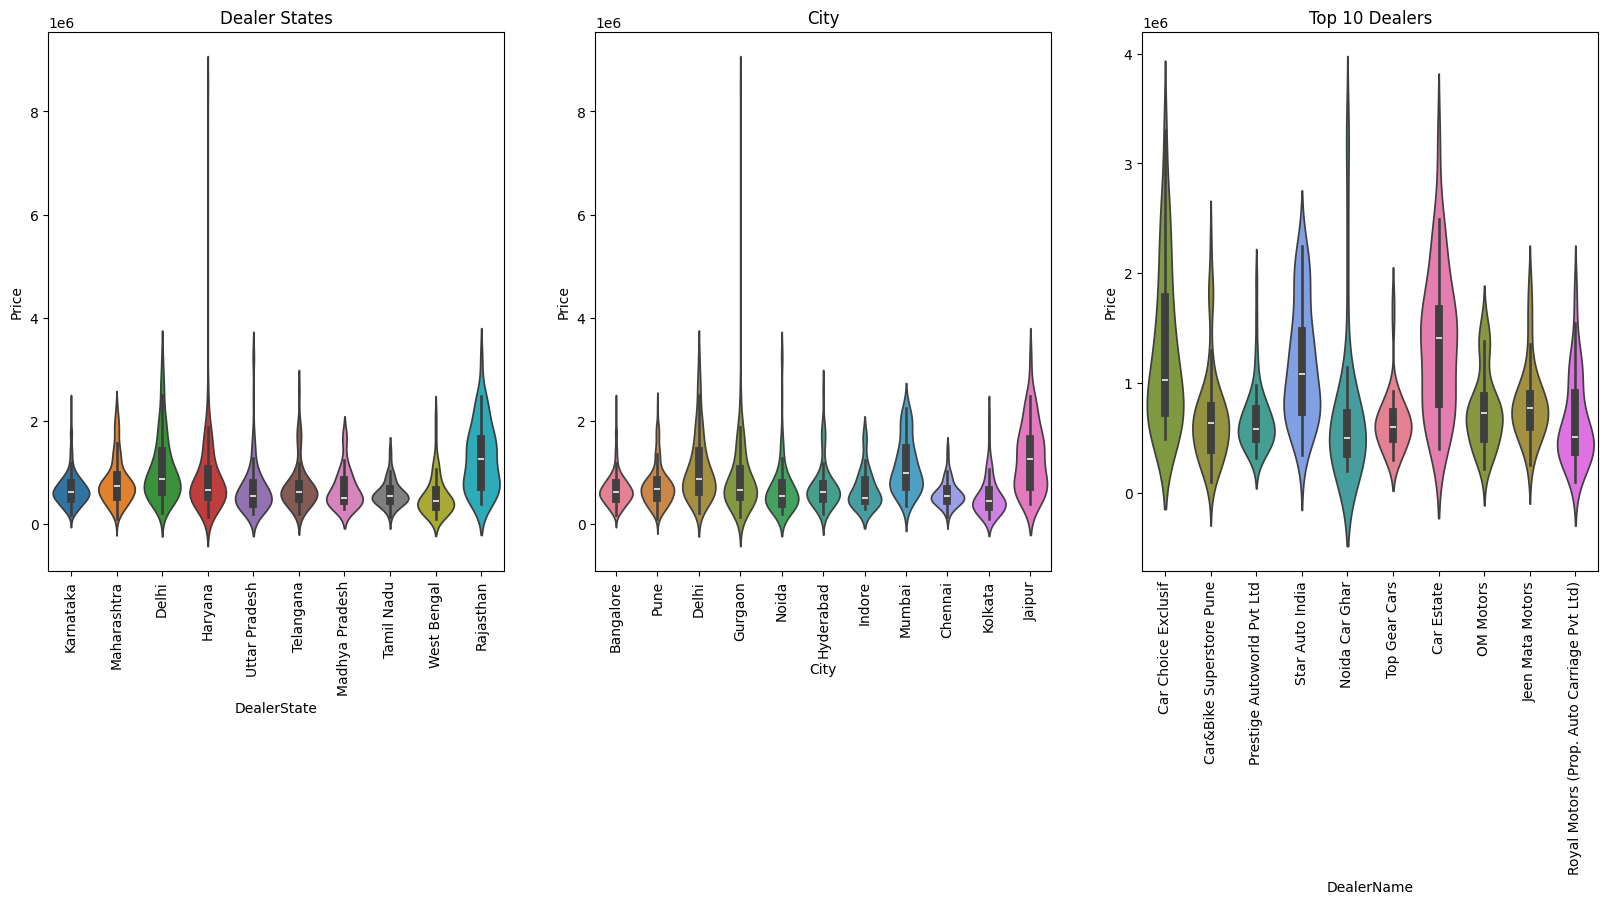

In [98]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

Text(0.5, 1.0, 'Price by Owner Type')

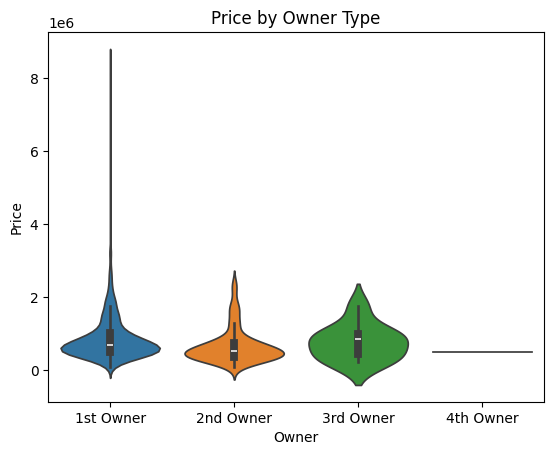

In [99]:
sns.violinplot(x = 'Owner', y = 'Price', data = df, hue = 'Owner').set_title('Price by Owner Type')

Text(0.5, 1.0, 'Price by Warranty')

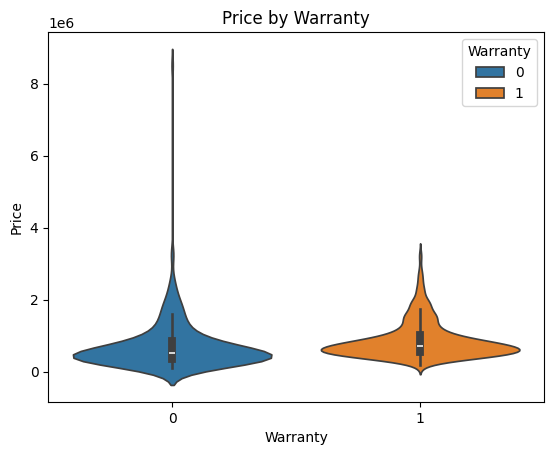

In [100]:
sns.violinplot(x = 'Warranty', y = 'Price', data = df, hue = 'Warranty').set_title('Price by Warranty')

Text(0.5, 1.0, 'Quality Score and Price')

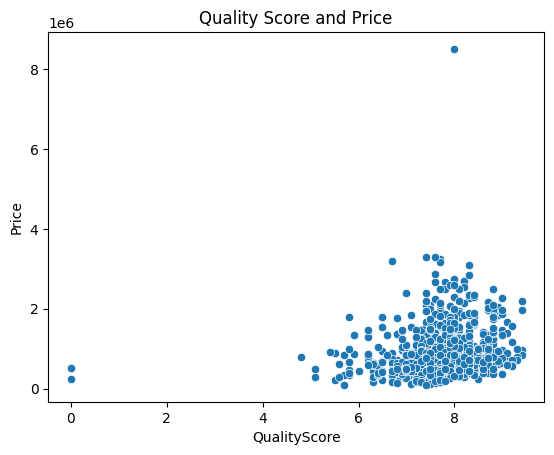

In [101]:
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('Quality Score and Price')

In [102]:
df.drop('Model', axis = 1, inplace = True)

In [103]:
df.isnull().sum()

Company         0
FuelType        0
Colour          0
Kilometer       0
BodyStyle       0
Age             0
Price           0
Owner           0
DealerState     0
DealerName      0
City            0
Warranty        0
QualityScore    0
dtype: int64

In [104]:
df.head()

,Company,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,PETROL,Silver,33197,HATCHBACK,6,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,PETROL,Red,10322,HATCHBACK,3,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,PETROL,Grey,37889,HATCHBACK,9,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,PETROL,A Blue,13106,HATCHBACK,4,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,DIESEL,Silver,104614,HATCHBACK,14,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [105]:
scaler = LabelEncoder()

In [106]:
categorical_cols = ['Company',
 'FuelType',
 'Colour',
 'BodyStyle',
 'Owner',
 'DealerState',
 'DealerName',
 'City']
numerical_cols = ['Kilometer', 'Age', 'Warranty', 'QualityScore']

In [107]:
for col in categorical_cols:
    df[col] = scaler.fit(df[col])

In [108]:
#Using IQRS to remove outliers

#columns for outlier removal
colss = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[colss].quantile(0.25)
Q3 = df[colss].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[colss] < (Q1 - 1.5 * IQR)) |(df[colss] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [109]:
df.shape

(891, 13)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 1063
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       891 non-null    object 
 1   FuelType      891 non-null    object 
 2   Colour        891 non-null    object 
 3   Kilometer     891 non-null    int64  
 4   BodyStyle     891 non-null    object 
 5   Age           891 non-null    int64  
 6   Price         891 non-null    float64
 7   Owner         891 non-null    object 
 8   DealerState   891 non-null    object 
 9   DealerName    891 non-null    object 
 10  City          891 non-null    object 
 11  Warranty      891 non-null    int64  
 12  QualityScore  891 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 97.5+ KB


In [111]:
x = df.drop('Price', axis=1)
y = df['Price']

In [112]:
cols = ['Company',
 'FuelType',
 'Colour',
 'BodyStyle',
 'Owner',
 'DealerState',
 'DealerName',
 'City']
from sklearn.base import BaseEstimator, TransformerMixin

class LabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {col: LabelEncoder() for col in cols}
    
    def fit(self, X, y=None):
        for col in cols:
            if X[col].isnull().any():
                X[col] = X[col].fillna('Unknown')
            self.label_encoders[col].fit(X[col])
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        for col in cols:
            if X[col].isnull().any():
                X_transformed[col] = X_transformed[col].fillna('Unknown')
            try:
                X_transformed[col] = self.label_encoders[col].transform(X_transformed[col])
            except ValueError:
                unseen_categories = set(X_transformed[col]) - set(self.label_encoders[col].classes_)
                print(f"Warning: Unseen categories in column '{col}': {unseen_categories}")
                X_transformed[col] = X_transformed[col].apply(
                    lambda x: self.label_encoders[col].transform([x])[0] if x in self.label_encoders[col].classes_ else -1
                )
        
        return X_transformed


# Define numerical columns (assuming you still have some)
numerical_cols = ['Kilometer', 'Age', 'Warranty', 'QualityScore']


# Create the Pipeline
numerical_cols = ['Kilometer', 'Age', 'Warranty', 'QualityScore']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', Pipeline(steps=[('label_encoder', LabelTransformer())]), cols)
    ]
)


In [113]:
base_models = [
    ('gbm1', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('gbm2', GradientBoostingRegressor(n_estimators=100, random_state=43)),
    ('xgb1', XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)),
    ('xgb2', XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=43)),
    ('xgb3', XGBRegressor(n_estimators=150, max_depth=5, learning_rate=0.1, random_state=44)),
    ('lgbm1', LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)),
    ('lgbm2', LGBMRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=43)),
    ('lgbm3', LGBMRegressor(n_estimators=150, max_depth=5, learning_rate=0.1, random_state=44)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define the meta model
meta_model = LinearRegression()

# Create the stacking regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

In [114]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', stacked_model)  # Use the stacked model here
])

In [115]:
x.head()

,Company,FuelType,Colour,Kilometer,BodyStyle,Age,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,LabelEncoder(),LabelEncoder(),LabelEncoder(),33197,LabelEncoder(),6,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),1,7.8
1,LabelEncoder(),LabelEncoder(),LabelEncoder(),10322,LabelEncoder(),3,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),1,8.3
2,LabelEncoder(),LabelEncoder(),LabelEncoder(),37889,LabelEncoder(),9,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),1,7.9
3,LabelEncoder(),LabelEncoder(),LabelEncoder(),13106,LabelEncoder(),4,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),1,8.1
4,LabelEncoder(),LabelEncoder(),LabelEncoder(),104614,LabelEncoder(),14,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),0,7.5


In [116]:
model_pipeline.fit(x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 4
[LightGBM] [Info] Start training from score 716105.499439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Kilometer', 'Age',
                                                   'Warranty',
                                                   'QualityScore']),
                                                 ('cat',
                                                  Pipeline(steps=[('label_encoder',
                                                                   LabelTransformer())]),
                                                  ['Company', 'FuelType',
                                                   'Colour', 'BodyStyle',
                                                   'Owner', 'DealerState',
                                                   'DealerName', 'City'])])),
                ('model',
                 StackingRegressor(cv=5,
                                   estimators=[('gbm1',
                                                GradientBoosti...
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=44, ...)),
                                               ('lgbm1',
                                                LGBMRegressor(max_depth=3,
                                                              random_state=42)),
                                               ('lgbm2',
                                                LGBMRegressor(learning_rate=0.05,
                                                              max_depth=4,
                                                              n_estimators=200,
                                                              random_state=43)),
                                               ('lgbm3',
                                                LGBMRegressor(max_depth=5,
                                                              n_estimators=150,
                                                              random_state=44)),
                                               ('rf',
                                                RandomForestRegressor(random_state=42))],
                                   final_estimator=LinearRegression()))])

In [117]:
joblib.dump(model_pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [118]:
input_data = pd.DataFrame([{
    "Company": "HONDA",
    "FuelType": "PETROL",
    "Colour": "White",
    "Kilometer": 160000.0,
    "BodyStyle": "SEDAN",
    "Age": 13,
    "Owner": "1st Owner",
    "DealerState": "Haryana",
    "DealerName": "OM Motors",
    "City": "Gurgaon",
    "Warranty": False,
    "QualityScore": 4.8
}])
print(input_data.dtypes)

# Use the model to predict
predicted_price = model_pipeline.predict(input_data)

# Print the predicted price
print(predicted_price)

Company          object
FuelType         object
Colour           object
Kilometer       float64
BodyStyle        object
Age               int64
Owner            object
DealerState      object
DealerName       object
City             object
Warranty           bool
QualityScore    float64
dtype: object
[262172.51639766]
